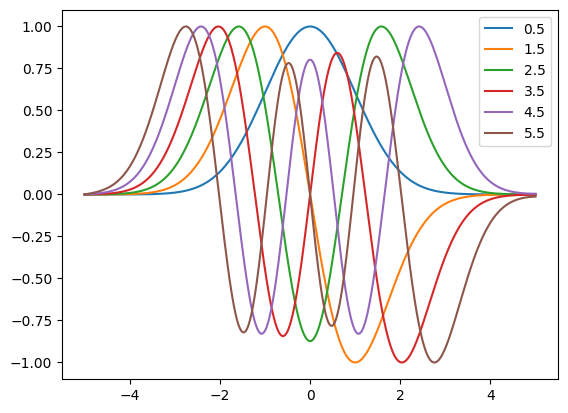

In [3]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm
from scipy.integrate import odeint

# Definimos las constantes
constante_hbarr = 1
masa = 1
frecuencia = 1

# Definimos el número de puntos y el rango de x
num_puntos = 1000
rango_x = np.linspace(-5,5,num_puntos)

# Definimos las condiciones iniciales para x
condiciones_iniciales = np.array([0.,1e-5])

# Definimos la función potencial_modificado1
def potencial_modificado1(x):
    V = 0.5*masa*frecuencia**2*x**2
    return V

# Definimos la función metodo_numerov
def metodo_numerov(rango_x,condiciones_iniciales,E,fV):
    
    h = rango_x[1]-rango_x[0]
    
    phi = np.zeros(len(rango_x))
    phi[0] = condiciones_iniciales[0]
    phi[1] = condiciones_iniciales[1]
    
    for i in range(2,len(rango_x)):
        
        cons = 2*masa/(constante_hbarr**2)
        R0 = cons*(fV(rango_x[i-2]) - E)
        R1 = cons*(fV(rango_x[i-1]) - E)
        R2 = cons*(fV(rango_x[i]) - E)
        
        y0 =  phi[i-2]*(1 - h**2*R0/12)
        y1 = 2*phi[i-1]*(1 + (5*h**2*R1)/12)
        y2 = 1 - h**2*R2/12
        
        phi[i] = (y1 - y0)/(y2)
        
    return phi

# Definimos los valores iniciales de energía
valores_energia_iniciales = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

# Creamos un array de ceros del mismo tamaño que valores_energia_iniciales
energia_procesada = np.zeros_like(valores_energia_iniciales)

# Iteramos sobre cada valor de energía
for i in range(len(valores_energia_iniciales)):
    phi = metodo_numerov(rango_x,condiciones_iniciales,valores_energia_iniciales[i], potencial_modificado1)
    phi = phi/max(phi)
    energia_procesada[i] = phi[-1]
    plt.plot(rango_x,phi,label = valores_energia_iniciales[i])
plt.legend()



### Potencial Gaussiano

In [4]:
# Definimos la función potencial_modificado2
def potencial_modificado2(x):
    return -10*np.exp(-x**2/20)

# Definimos los valores de energía
valores_energia = np.array([-9.51, -8.54, -7.62, -6.74, -5.89])

# Creamos un array de ceros del mismo tamaño que valores_energia
energia_procesada = np.zeros_like(valores_energia)

# Iteramos sobre cada valor de energía
for i in range(len(valores_energia)):
    phi = metodo_numerov(rango_x,condiciones_iniciales,valores_energia[i], potencial_modificado2)
    energia_procesada[i] = phi[-1]
energia_procesada





array([ 6.94718198e+01,  1.46837580e+01, -3.44258189e-01,  5.84160968e-03,
       -4.90751748e-03])

### Potencial racional

In [5]:
# Definimos la función potencial_modificado3
def potencial_modificado3(x):
    return -(4)/((1+x**2)**2)

# Definimos los valores de energía
valores_energia = np.array([-1.478, -0.163])

# Creamos un array de ceros del mismo tamaño que valores_energia
energia_procesada = np.zeros_like(valores_energia)



# Iteramos sobre cada valor de energía
for i in range(len(valores_energia)):
    phi = metodo_numerov(rango_x,condiciones_iniciales,valores_energia[i], potencial_modificado3)
    energia_procesada[i] = phi[-1]
    
energia_procesada

array([-3.34190301e+02,  3.91315847e-02])